# CNN识别猫狗

In [3]:
# 依赖导入
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from matplotlib import pyplot as plt
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [4]:
# 数据加载
data_generator = ImageDataGenerator(rescale=1/255)
training_set = data_generator.flow_from_directory("/Users/mac/Desktop/chapter3_task1_data/training_set/", 
                                                        target_size=(50, 50), 
                                                        batch_size=32, 
                                                        class_mode="binary")

Found 8000 images belonging to 2 classes.


In [5]:
# 查看数据类型
type(training_set)

keras.preprocessing.image.DirectoryIterator

In [6]:
# 每个批次的样本数量
training_set.batch_size

32

In [7]:
# 加载的图片名称
training_set.filenames

['cats/cats_1.jpg',
 'cats/cats_10.jpg',
 'cats/cats_100.jpg',
 'cats/cats_1000.jpg',
 'cats/cats_1001.jpg',
 'cats/cats_1002.jpg',
 'cats/cats_1003.jpg',
 'cats/cats_1004.jpg',
 'cats/cats_1005.jpg',
 'cats/cats_1006.jpg',
 'cats/cats_1007.jpg',
 'cats/cats_1008.jpg',
 'cats/cats_1009.jpg',
 'cats/cats_101.jpg',
 'cats/cats_1010.jpg',
 'cats/cats_1011.jpg',
 'cats/cats_1012.jpg',
 'cats/cats_1013.jpg',
 'cats/cats_1014.jpg',
 'cats/cats_1015.jpg',
 'cats/cats_1016.jpg',
 'cats/cats_1017.jpg',
 'cats/cats_1018.jpg',
 'cats/cats_1019.jpg',
 'cats/cats_102.jpg',
 'cats/cats_1020.jpg',
 'cats/cats_1021.jpg',
 'cats/cats_1022.jpg',
 'cats/cats_1023.jpg',
 'cats/cats_1024.jpg',
 'cats/cats_1025.jpg',
 'cats/cats_1026.jpg',
 'cats/cats_1027.jpg',
 'cats/cats_1028.jpg',
 'cats/cats_1029.jpg',
 'cats/cats_103.jpg',
 'cats/cats_1030.jpg',
 'cats/cats_1031.jpg',
 'cats/cats_1032.jpg',
 'cats/cats_1033.jpg',
 'cats/cats_1034.jpg',
 'cats/cats_1035.jpg',
 'cats/cats_1036.jpg',
 'cats/cats_1037.jpg

In [8]:
# 确认标签
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [9]:
# training_set[][][]  第一个中括号为第几个批次；第二个中括号为确定输入x还是y；第三个中括号用于确定第几个样本
training_set[5][0]

array([[[[0.54901963, 0.42352945, 0.34117648],
         [0.6       , 0.41960788, 0.35686275],
         [0.59607846, 0.44705886, 0.3647059 ],
         ...,
         [0.10196079, 0.08627451, 0.0509804 ],
         [0.1137255 , 0.09803922, 0.05490196],
         [0.12156864, 0.10588236, 0.0627451 ]],

        [[0.58431375, 0.41960788, 0.3254902 ],
         [0.5921569 , 0.43529415, 0.3372549 ],
         [0.6039216 , 0.454902  , 0.37254903],
         ...,
         [0.10980393, 0.09411766, 0.05882353],
         [0.11764707, 0.10196079, 0.05882353],
         [0.13333334, 0.11764707, 0.07450981]],

        [[0.6       , 0.4156863 , 0.3529412 ],
         [0.6039216 , 0.41960788, 0.35686275],
         [0.59607846, 0.43529415, 0.35686275],
         ...,
         [0.10980393, 0.08235294, 0.0509804 ],
         [0.10588236, 0.09019608, 0.05490196],
         [0.1254902 , 0.10980393, 0.07450981]],

        ...,

        [[0.5254902 , 0.07058824, 0.07450981],
         [0.5294118 , 0.07450981, 0.07843138]

In [10]:
training_set[5][1]

array([0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0.],
      dtype=float32)

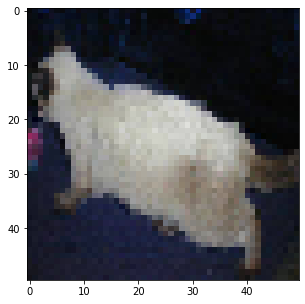

In [11]:
# 可视化第1个批次第一张图片
fig1 = plt.figure(figsize=(5, 5))
plt.imshow(training_set[0][0][0])

In [12]:
# 加载后按批次存放的每个样本对应的索引号
training_set.index_array

array([1585, 3592, 7059, ..., 1024, 2242, 6958])

In [13]:
# 获取文件名称
training_set.filenames[1585]

'cats/cats_2425.jpg'

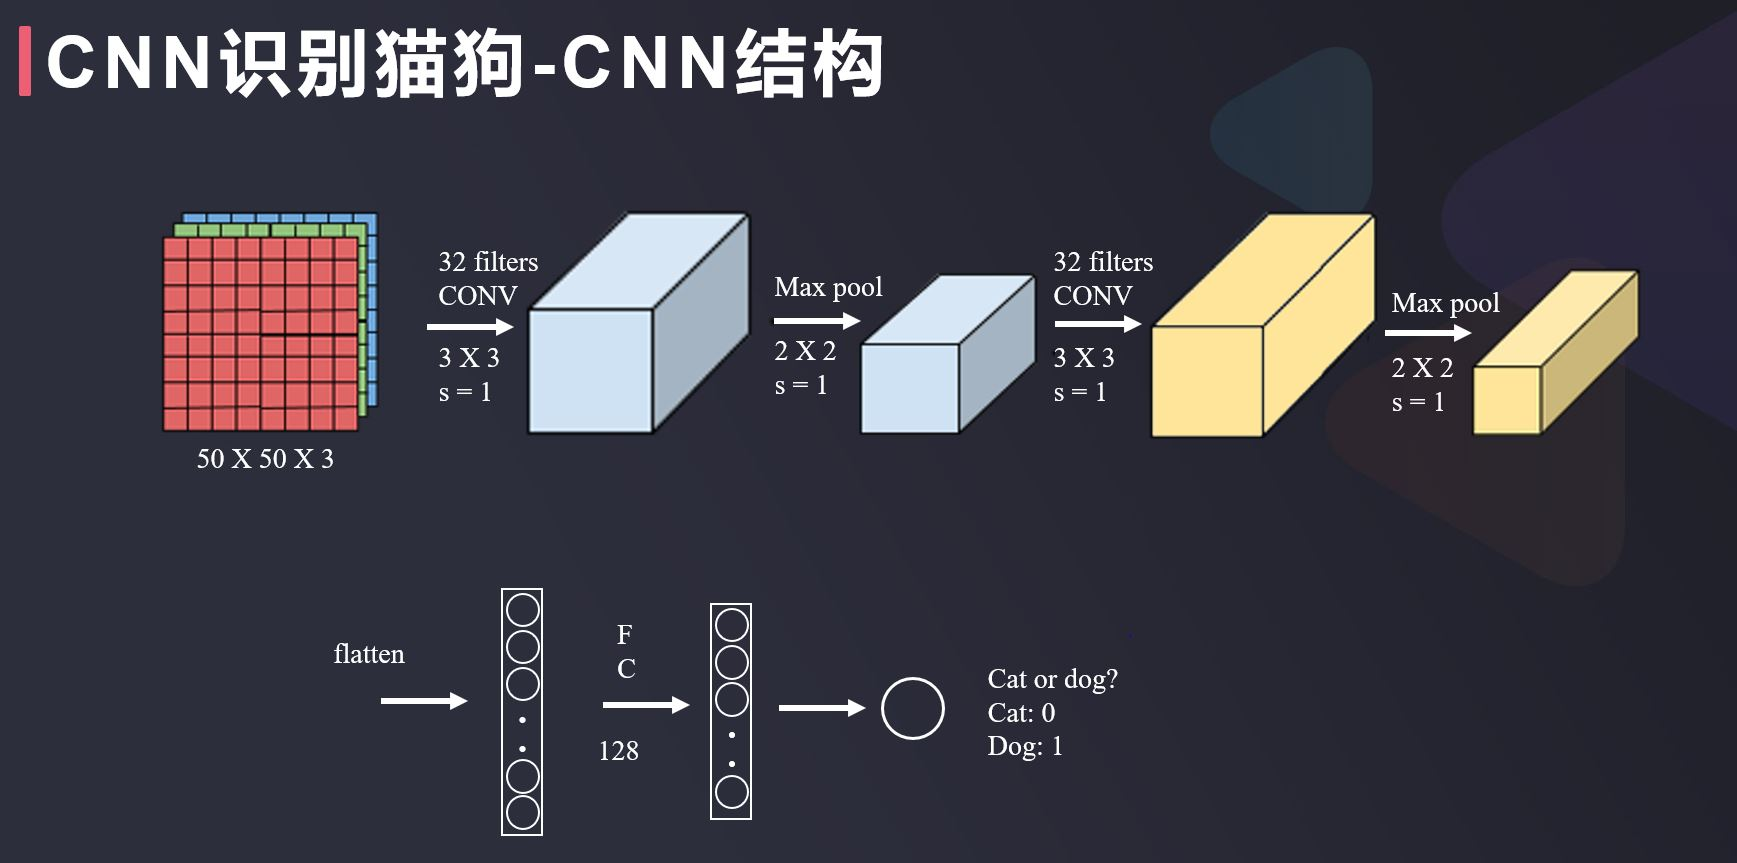

In [14]:
# 建立CNN模型
cnn_model = Sequential()
# 添加卷积层
cnn_model.add(Conv2D(32, (3, 3), input_shape=(50, 50, 3), activation="relu"))
# 添加池化层
cnn_model.add(MaxPool2D(pool_size=(2, 2)))
# 添加第二个卷积层
cnn_model.add(Conv2D(32, (3,3), activation="relu"))
# 添加第二个池化层
cnn_model.add(MaxPool2D(pool_size=(2, 2)))
# flatten展开
cnn_model.add(Flatten())
# FC层
cnn_model.add(Dense(units=128, activation="relu"))
# 预测输出层
cnn_model.add(Dense(units=1, activation="sigmoid"))
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3872)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               495744    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [15]:
# 模型配置
cnn_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [16]:
# 模型训练
cnn_model.fit_generator(training_set, epochs=20)

Epoch 1/20
250/250 [==============================] - 27s 107ms/step - loss: 0.6597 - accuracy: 0.6015
Epoch 2/20
250/250 [==============================] - 24s 95ms/step - loss: 0.5759 - accuracy: 0.6998
Epoch 3/20
250/250 [==============================] - 21s 82ms/step - loss: 0.5154 - accuracy: 0.7433
Epoch 4/20
250/250 [==============================] - 21s 84ms/step - loss: 0.4690 - accuracy: 0.7740
Epoch 5/20
250/250 [==============================] - 21s 83ms/step - loss: 0.4264 - accuracy: 0.8023
Epoch 6/20
250/250 [==============================] - 21s 85ms/step - loss: 0.3918 - accuracy: 0.8210
Epoch 7/20
250/250 [==============================] - 21s 83ms/step - loss: 0.3481 - accuracy: 0.8445
Epoch 8/20
250/250 [==============================] - 20s 81ms/step - loss: 0.3057 - accuracy: 0.8650
Epoch 9/20
250/250 [==============================] - 20s 81ms/step - loss: 0.2631 - accuracy: 0.8876
Epoch 10/20
250/250 [==============================] - 21s 82ms/step - loss: 0.21

In [17]:
# 训练集数据预测准确率
accuracy_train = cnn_model.evaluate_generator(training_set)
print(accuracy_train)

[0.007893145084381104, 0.9947500228881836]


In [18]:
# 模型存储
cnn_model.save("./task1_practise.h5")

In [19]:
# 模型加载
loaded_model = load_model("./task1_practise.h5")

In [20]:
# 测试数据集准确率评估
test_set = data_generator.flow_from_directory("/Users/mac/Desktop/chapter3_task1_data/test_set/",
                                              target_size=(50, 50), 
                                              batch_size=32, 
                                              class_mode="binary")

Found 2000 images belonging to 2 classes.


In [21]:
accuracy_test = loaded_model.evaluate_generator(test_set)
print(accuracy_test)

[1.0196518898010254, 0.7680000066757202]


In [22]:
# 单张图片的预测
pic1_path = "/Users/mac/Desktop/chapter3_verify/1.png"
pic1 = load_img(pic1_path, target_size=(50, 50))
pic1_array = img_to_array(pic1)
pic1_normal = pic1_array/255
pic1_normal = pic1_normal.reshape(1,50,50,3)

In [23]:
# 预测
result = loaded_model.predict_classes(pic1_normal)
print("dog" if result == 1 else "cat")

dog


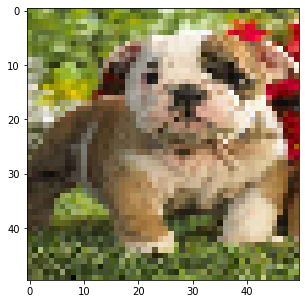

In [24]:
fig2 = plt.figure(figsize=(5,5))
plt.imshow(pic1_normal[0])

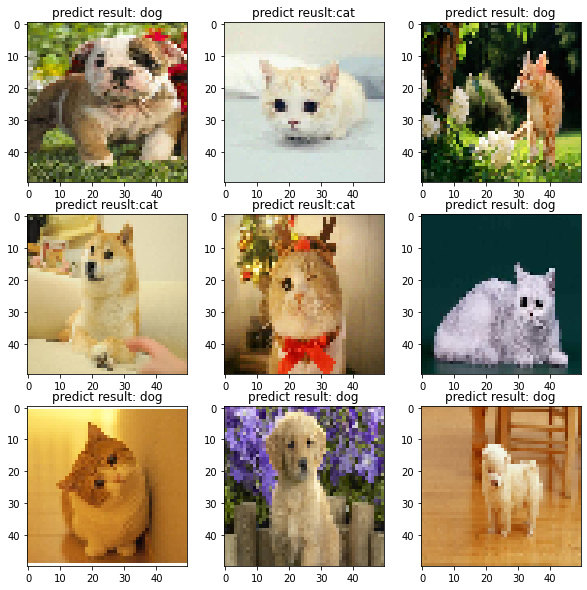

In [25]:
# 本地九张图片处理
fig3 = plt.figure(figsize=(10,10))
for i in range(1,10):
    img_name = "{}.png".format(i)
    pic_path = "/Users/mac/Desktop/chapter3_verify/" + img_name
    pic = load_img(pic_path, target_size=(50, 50))
    pic_array = img_to_array(pic)
    pic_normal = pic_array/255
    pic_normal = pic_normal.reshape(1,50,50,3)
    result = loaded_model.predict_classes(pic_normal)
    plt.subplot(3, 3, i)
    plt.imshow(pic_normal[0])
    plt.title('predict result: dog' if result==1 else 'predict reuslt:cat')
